In [19]:
import nltk


In [20]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shris\AppData\Roaming\nltk_data...


True

In [26]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shris\AppData\Roaming\nltk_data...


True

In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [36]:
pip install spacy

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.2/12.1 MB 4.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/12.1 MB 6.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.1 MB 6.7 MB/s eta 0:00:02
   --- ------------------------------------ 1.2/12.1 MB 6.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/12.1 MB 6.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/12.1 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/12.1 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/12.1 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/12.1 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/12.1 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/12.1 MB 6.7 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/12.1 MB 3.5 MB/s eta 0:00:03
   ---

In [44]:
pip install spacy-en-core-web-lg


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement spacy-en-core-web-lg (from versions: none)
ERROR: No matching distribution found for spacy-en-core-web-lg


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


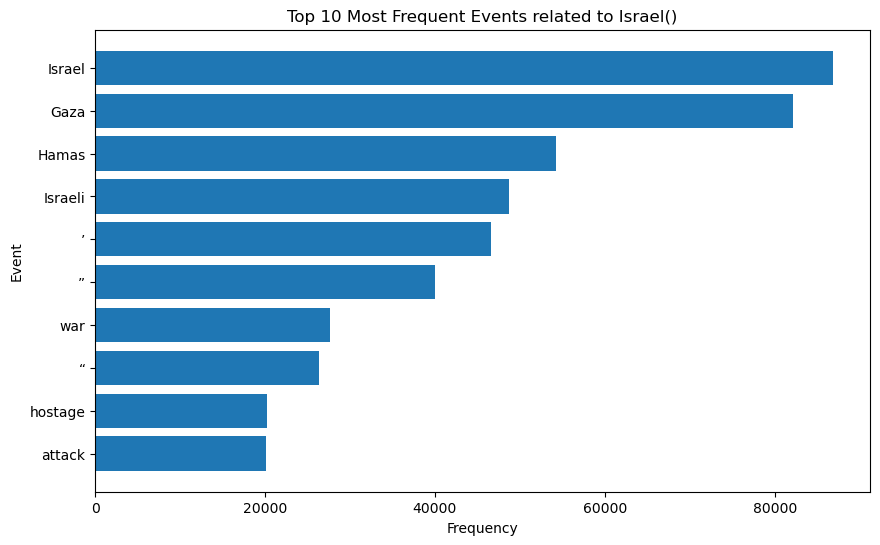

In [48]:
import json
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import matplotlib.pyplot as plt

nltk.download('punkt')

def preprocess_text(text):
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
  pos_tags = pos_tag(lemmatized_tokens)
  filtered_pos_tags = [tag[0] for tag in pos_tags if tag[1] in ['NN', 'NNP']]
  return filtered_pos_tags

def analyze_news_articles(json_file_path):
  try:
    with open(json_file_path, 'r', encoding='utf-8') as file:
      articles = json.load(file)
  except (FileNotFoundError, json.JSONDecodeError) as e:
    print(f"Error reading JSON file: {e}")
    return

  relevant_articles = [article for article in articles if 'Israel' in article['title']]

  # Process and analyze articles
  events = []
  for article in relevant_articles:
    if 'scrapedDate' in article and '$date' in article['scrapedDate']:
      date = article['scrapedDate']['$date']
    else:
      print(f"Article missing 'scrapedDate' field: {article['title']}")
      continue  # Skip to the next article

    processed_text = preprocess_text(article['articleBody'])
    events.extend(processed_text)

  # Organize extracted events and dates into a timeline
  timeline = {}
  for event in events:
    if event in timeline:
      timeline[event] += 1
    else:
      timeline[event] = 1

  # Create a timeline visualization
  df = pd.DataFrame.from_dict(timeline, orient='index', columns=['Frequency'])
  df = df.sort_values(by='Frequency', ascending=False)

  plt.figure(figsize=(10, 6))
  plt.barh(df.index[:10], df['Frequency'][:10])
  plt.xlabel('Frequency')
  plt.ylabel('Event')
  plt.title('Top 10 Most Frequent Events related to Israel()')
  plt.gca().invert_yaxis()  # Invert y-axis to show most frequent events on top
  plt.show()


json_file_path = 'news.article.json' 
analyze_news_articles(json_file_path)


In [32]:
for article in articles[:2]:
    print(article)


{'articleBody': 'Sanjay Raut, a member of the Shiv Sena (UBT) party, responded to the Maharashtra chief minister\'s statement that Eknath Shinde "himself is Hamas" and that the Shiv Sena group led by Uddhav Thackeray is capable of collaborating with "Hamas and Lashkar-e-Taiba for their own selfishness" on Wednesday by claiming that Eknath Shinde is Hamas.\n\n\n\nRaut made fun of Shinde by claiming, "He himself is Hamas. Hamas and Lashkar-e-Taiba, two terrorist groups, are completely irrelevant in Maharashtra. But the BJP is to blame for sowing the worms in their (the Shinde faction\'s) thoughts, said Raut.\n\nWhen Shinde made a statement at the Tuesday Dussehra rally in Mumbai\'s Azad Maidan, Raut reacted to it. As part of the opposition alliance INDIA, Uddhav Thackeray\'s Shiv Sena (UBT) has formed an alliance with Congress and the Samajwadi Party. Shinde remarked of this alliance: "For their own selfishness, they will tie the knot with Hamas and Lashkar-e-Taiba."\n\nRaut highlighted 

In [42]:
import pandas as pd
import re

def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

try:
  with open('news.article.json', 'r', encoding='utf-8') as file:
    articles = json.load(file)
except FileNotFoundError:
  print("Error: File 'news.article.json' not found!")
except json.JSONDecodeError:
  print("Error: Invalid JSON file format!")
  exit()

titles = []
dates = []
descriptions = []
for article in articles:
  try:
    title = article.get('title', None)
    date = article.get('dateModified', {}).get('$date', None)
    description = article.get('articleBody', None)
    if title and date and description:
      titles.append(title)
      dates.append(date)
      descriptions.append(description)
  except KeyError:
    print("Warning: Missing key in an article!")

df = pd.DataFrame({'title': titles, 'date': dates, 'desc': descriptions})

try:
  df['date'] = pd.to_datetime(df['date'])
  df['date_str'] = df['date'].dt.strftime('%Y-%m-%d')  # Format date as YYYY-MM-DD
except:
  print("Error: Invalid date format!")

df['desc_clean'] = df['desc'].apply(preprocess_text)

# Sort the DataFrame by date
df = df.sort_values(by='date').reset_index(drop=True)

print(df.head())


                                               title  \
0  Sidra Amin's fourth century in vain as New Zea...   
1  Pakistan women look to continue winning ways i...   
2  Fatima Sana becomes the 10th ODI captain to le...   
3  Pakistan women's team to depart for Dunedin to...   
4                                 Update on Nida Dar   

                       date  \
0 2014-01-10 23:29:29+00:00   
1 2014-01-10 23:29:29+00:00   
2 2014-01-10 23:29:29+00:00   
3 2014-01-10 23:29:29+00:00   
4 2014-01-10 23:29:29+00:00   

                                                desc    date_str  \
0  Scorecard is available here\n\nAction pictures...  2014-01-10   
1  Three ICC Women’s Championship matches to be p...  2014-01-10   
2  Nida Dar ruled out due to face injury occurred...  2014-01-10   
3  New Zealand XI beat Pakistan women’s team by 2...  2014-01-10   
4  Queenstown, 12 December 2023: Pakistan captain...  2014-01-10   

                                          desc_clean  
0  scorecard